# Algoritmos Genéticos
Grupo: Chasipanta Pablo, Dennis Ocaña

### Importar librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definición de funciones y algoritmo

In [2]:
def fitness(people, func):
    return func(people)

def roulette(vals):
    threshold = np.random.rand() * np.sum(vals)
    acc = 0
    for i in range(len(vals)):
        acc += vals[i]
        if acc > threshold:
            return i
    return len(vals) - 1

def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutation(child, prob):
    for i in range(len(child)):
        if np.random.rand() < prob:
            child[i] = 1 - child[i]
    return child

def genetic_algorithm(func, n_dim, pop_size, n_generations, mutation_prob):
    # Initialize population
    population = np.random.randint(2, size=(pop_size, n_dim))

    best_values_over_time = []

    for generation in range(n_generations):
        # Evaluate population
        fit = fitness(population, func)

        # Select parents using roulette
        parents = [population[roulette(fit)] for _ in range(pop_size)]

        # Track best value in each generation
        best_value_in_generation = np.max(fitness(population, func))
        best_values_over_time.append(best_value_in_generation)

        # Create new generation
        new_generation = []
        for i in range(0, pop_size, 2):
            child1, child2 = crossover(parents[i], parents[i + 1])
            new_generation.append(mutation(child1, mutation_prob))
            new_generation.append(mutation(child2, mutation_prob))

        # Replace old population with new generation
        population = np.array(new_generation)

    # Find best individual in last generation
    best_individual = population[np.argmax(fitness(population, func))]
    best_value = func(best_individual)

    return best_individual, best_value, best_values_over_time

# Define the n-dimensional function to maximize (example)
def example_function(x):
    return np.sum(x, axis=0)

### Ejecución del Algoritmo

In [3]:
# Parameters of the genetic algorithm
n_dim = 20
pop_size = 100
n_generations = 100000
mutation_prob = 0.15

# Run the genetic algorithm 5 times
results = []
for _ in range(5):
    best_individual, best_value, best_values_over_time = genetic_algorithm(example_function, n_dim, pop_size, n_generations, mutation_prob)
    results.append((best_individual, best_value, best_values_over_time))    
    print("Best individual:", best_individual)
    print("Best value:", best_value)
    print("----")

Best individual: [1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1]
Best value: 10
----
Best individual: [1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1]
Best value: 14
----
Best individual: [0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0]
Best value: 6
----
Best individual: [1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1]
Best value: 11
----
Best individual: [0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0]
Best value: 10
----


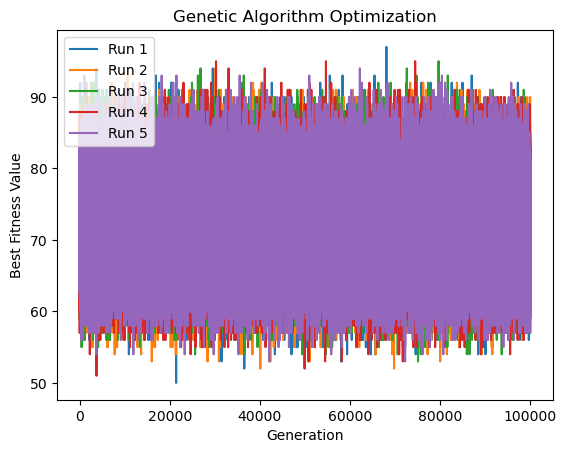

In [4]:
# Plot the results
plt.figure()
for i, (best_individual, best_value, best_values_over_time) in enumerate(results):
    plt.plot(range(n_generations), best_values_over_time, label=f"Run {i+1}")
plt.xlabel("Generation")
plt.ylabel("Best Fitness Value")
plt.title("Genetic Algorithm Optimization")
plt.legend()
plt.show()